# 1. CORPUS CREATION

In this part, we are going to create a corpus with articles from the following url:

http://www.sciencealert.com/health

Instead of copying and pasting manually, with a few lines of code, we can scrape as many articles as we want.

In [2]:
"""
Defining necessary functions
"""

from bs4 import BeautifulSoup
import requests, os, time

def find_article_urls(page_url):
    response = requests.get(page_url).text
    soup = BeautifulSoup(response, "lxml")
    urls = ['http://www.sciencealert.com'+k.find('a')['href'] for k in soup.find_all('div', 'titletext')]
    return urls

def collect_urls(category, npage):
    urls = []
    for i in range(npage):
        start = 14*i
        page_url = 'http://www.sciencealert.com/index.php?'+\
                'option=com_sciencealertfrontpage&'+\
                'view=getarticles&'+\
                'cat_title='+category+'&'+\
                'start='+str(start)+'&'+\
                'tmpl=component'
        urls.extend(find_article_urls(page_url))
    urls = set(urls) # avoid duplication
    return urls

def create_folder(rel_path): # create folder with a relative path
    if not os.path.exists(rel_path):
        os.makedirs(rel_path)
        
def write_file(path, filename, title, content):
    f = open(path+filename+'.txt', 'w')
    f.write(title+'\n\n\n'+content)
    f.close()


In [7]:
'''
Scraping article urls. Defining category and the number of pages we want to scrape.
'''

create_folder('text-files')
path = 'text-files/'
urls = collect_urls('health', 5) # set category and the number of pages 
print('Total number of collected urls: {}'.format(len(urls)))
print(urls)

Total number of collected urls: 60
{'http://www.sciencealert.com/here-s-why-you-are-constantly-tired-even-if-you-get-enough-sleep', 'http://www.sciencealert.com/scientists-have-turned-spinach-into-working-human-heart-tissue', 'http://www.sciencealert.com/scientists-discover-a-new-way-to-get-cancer-cells-to-self-destruct', 'http://www.sciencealert.com/there-s-a-breakthrough-in-how-we-treat-cancer-on-the-horizon-but-genetic-testing-right-now-is-like-the-wild-wild-west', 'http://www.sciencealert.com/scientists-are-using-gene-editing-to-target-cancer-s-command-centre', 'http://www.sciencealert.com/this-cheap-old-drug-can-save-thousands-of-new-mothers-from-bleeding-to-death', 'http://www.sciencealert.com/human-umbilical-blood-has-regenerated-the-brains-of-ageing-mice', 'http://www.sciencealert.com/giving-up-gluten-doesn-t-cut-your-risk-of-heart-disease-new-study-says', 'http://www.sciencealert.com/your-blood-type-could-be-linked-to-a-higher-risk-of-heart-attack-or-stroke', 'http://www.scien

In [15]:
"""
Scrape content articles and write into files
"""

for url in urls:
    response = requests.get(url).text
    soup = BeautifulSoup(response, "lxml")
    filename = url.replace('http://www.sciencealert.com/', 'sciencealert-com-')
    title = soup.find('div', 'article-title').text
    content = " ".join([p.get_text() for p in soup.find('div', 'article-fulltext').find_all('p')])
    print('Writing file for url: {}'.format(url))
    write_file(path, filename, title, content)
    #time.sleep(1) # avoid being blocked


Writing file for url: http://www.sciencealert.com/here-s-why-you-are-constantly-tired-even-if-you-get-enough-sleep
Writing file for url: http://www.sciencealert.com/scientists-have-turned-spinach-into-working-human-heart-tissue
Writing file for url: http://www.sciencealert.com/scientists-discover-a-new-way-to-get-cancer-cells-to-self-destruct
Writing file for url: http://www.sciencealert.com/there-s-a-breakthrough-in-how-we-treat-cancer-on-the-horizon-but-genetic-testing-right-now-is-like-the-wild-wild-west
Writing file for url: http://www.sciencealert.com/scientists-are-using-gene-editing-to-target-cancer-s-command-centre
Writing file for url: http://www.sciencealert.com/this-cheap-old-drug-can-save-thousands-of-new-mothers-from-bleeding-to-death
Writing file for url: http://www.sciencealert.com/human-umbilical-blood-has-regenerated-the-brains-of-ageing-mice
Writing file for url: http://www.sciencealert.com/giving-up-gluten-doesn-t-cut-your-risk-of-heart-disease-new-study-says
Writing

# 2. IDENTIFY KEY STATISTICS



In [2]:
import os
from textblob import TextBlob

# Exclude unnecessary files produced by Macos
def check_file(filename):
    if filename.startswith('._') or not filename.endswith('.txt'):
        return None
    return filename


bloblist = [] # bloblist contains Blob text of each document
rawlist = []

path = 'text-files/'
for filename in os.listdir(path):
    if check_file(filename):
        with open(os.path.join(path, filename), 'r', encoding='utf-8', errors='ignore') as f:
            text = f.read()
            blob = TextBlob(text)
            blob_lower = blob.lower()
            bloblist.append(blob_lower)
            rawlist.append(text)
        
print('Number of documents: {}'.format(len(bloblist)))


Number of documents: 60


### Word count statistics for each document, and total for the corpus

In [24]:
corpus_total_words = 0
for i, blob in enumerate(bloblist):
    corpus_total_words = corpus_total_words + len(blob.words)
    print("Text {}".format(i + 1), ": ", len(blob.words))
print("Total:", corpus_total_words)

Text 1 :  608
Text 2 :  1214
Text 3 :  875
Text 4 :  847
Text 5 :  694
Text 6 :  632
Text 7 :  699
Text 8 :  834
Text 9 :  588
Text 10 :  549
Text 11 :  577
Text 12 :  635
Text 13 :  662
Text 14 :  610
Text 15 :  339
Text 16 :  470
Text 17 :  733
Text 18 :  770
Text 19 :  615
Text 20 :  622
Text 21 :  810
Text 22 :  717
Text 23 :  759
Text 24 :  472
Text 25 :  668
Text 26 :  634
Text 27 :  577
Text 28 :  662
Text 29 :  630
Text 30 :  614
Text 31 :  404
Text 32 :  517
Text 33 :  508
Text 34 :  1095
Text 35 :  490
Text 36 :  646
Text 37 :  581
Text 38 :  831
Text 39 :  568
Text 40 :  764
Text 41 :  850
Text 42 :  920
Text 43 :  614
Text 44 :  709
Text 45 :  623
Text 46 :  447
Text 47 :  826
Text 48 :  491
Text 49 :  736
Text 50 :  410
Text 51 :  629
Text 52 :  856
Text 53 :  831
Text 54 :  902
Text 55 :  653
Text 56 :  1151
Text 57 :  621
Text 58 :  936
Text 59 :  1142
Text 60 :  852
Total: 41719


### Word frequency distribution for top 10 words per document

In [27]:
from nltk.corpus import stopwords

sw = stopwords.words('english')

for i, blob in enumerate(bloblist):
    blob_frequency_dictionary = {}
    for word in blob.words:
        count = blob.words.count(word)
        if word not in blob_frequency_dictionary:
            # add stopword filtering here by uncommenting the next line, and indenting the line after it
            if word.lower() not in sw:
                blob_frequency_dictionary[word] = count
        sorted_words = sorted(blob_frequency_dictionary.items(), key=lambda x: x[1], reverse=True)
    print('10 Most frequent words in document {}'.format(i + 1))
    for word in sorted_words[:10]:
        print("\t - {}: {}".format(word[0], word[1]))

10 Most frequent words in document 1
	 - peer: 9
	 - review: 9
	 - journal: 6
	 - research: 5
	 - 's: 5
	 - massive: 4
	 - papers: 4
	 - year: 4
	 - told: 4
	 - chinese: 4
10 Most frequent words in document 2
	 - 's: 18
	 - myth: 12
	 - bogus: 11
	 - water: 8
	 - caffeine: 7
	 - people: 7
	 - like: 7
	 - n't: 5
	 - found: 5
	 - fish: 5
10 Most frequent words in document 3
	 - water: 37
	 - bottled: 21
	 - tap: 11
	 - 's: 8
	 - americans: 6
	 - recent: 6
	 - found: 6
	 - us: 5
	 - quality: 5
	 - report: 5
10 Most frequent words in document 4
	 - 's: 11
	 - parasite: 8
	 - brain: 7
	 - infection: 7
	 - maui: 6
	 - rat: 5
	 - lungworm: 5
	 - island: 4
	 - cases: 4
	 - spread: 4
10 Most frequent words in document 5
	 - cells: 24
	 - beta: 18
	 - new: 10
	 - type: 10
	 - diabetes: 8
	 - cell: 6
	 - 1: 6
	 - could: 6
	 - researchers: 5
	 - 's: 5
10 Most frequent words in document 6
	 - cells: 14
	 - 's: 13
	 - stem: 10
	 - cell: 10
	 - patient: 8
	 - donor: 6
	 - ips: 6
	 - last: 5
	 - team:

### Term frequency – Inverse Document frequency for top 10 words per document

In [29]:
import math

def tf(word, blob):
    return blob.words.count(word) / len(blob.words)

def n_containing(word, bloblist):
    return sum(1 for blob in bloblist if word in blob.words)

def idf(word, bloblist):
    return math.log(len(bloblist) / (1 + n_containing(word, bloblist)))

def tfidf(word, blob, bloblist):
    return tf(word, blob) * idf(word, bloblist)

In [30]:
for i, blob in enumerate(bloblist):
    print("Top words in document {}".format(i + 1))
    scores = {word: tfidf(word, blob, bloblist) for word in blob.words}
    sorted_words = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    for word, score in sorted_words[:10]:
        print("\t{}, TF-IDF: {}".format(word, round(score, 5)))

Top words in document 1
	peer, TF-IDF: 0.05035
	review, TF-IDF: 0.03678
	papers, TF-IDF: 0.01971
	massive, TF-IDF: 0.01782
	chinese, TF-IDF: 0.01782
	107, TF-IDF: 0.01678
	tumor, TF-IDF: 0.01678
	springer, TF-IDF: 0.01678
	third-party, TF-IDF: 0.01678
	sage, TF-IDF: 0.01678
Top words in document 2
	bogus, TF-IDF: 0.02714
	myth, TF-IDF: 0.02677
	caffeine, TF-IDF: 0.01328
	salt, TF-IDF: 0.01234
	mg, TF-IDF: 0.01121
	potatoes, TF-IDF: 0.01121
	why, TF-IDF: 0.01091
	water, TF-IDF: 0.01061
	fish, TF-IDF: 0.01023
	sweeteners, TF-IDF: 0.00987
Top words in document 3
	bottled, TF-IDF: 0.08163
	water, TF-IDF: 0.06806
	tap, TF-IDF: 0.03766
	americans, TF-IDF: 0.01473
	quality, TF-IDF: 0.0142
	stuff, TF-IDF: 0.01238
	drinking, TF-IDF: 0.01238
	litres, TF-IDF: 0.01238
	recent, TF-IDF: 0.01229
	bottle, TF-IDF: 0.01166
Top words in document 4
	parasite, TF-IDF: 0.03212
	maui, TF-IDF: 0.02409
	lungworm, TF-IDF: 0.02008
	infection, TF-IDF: 0.01776
	rat, TF-IDF: 0.01768
	my, TF-IDF: 0.01631
	island, TF

### All noun phrases for each document

In [31]:
for i, blob in enumerate(bloblist):
    print('Noun_phrases in document {}'.format(i + 1))
    noun_phrases = sorted(blob.noun_phrases)
    print('========================================')
    print(noun_phrases)
    print('========================================')

Noun_phrases in document 1
["'fake peer review", 'actual researcher', 'alison mccook', 'ars technica', 'ars technica', 'big academic publishers', 'cancer journal', "cathleen o'grady", 'chinese clinical trials', 'chinese researchers', 'chinese researchers', 'chinese scientists', 'data fabrication', 'editing company', 'editor-in-chief torgny stigbrand', 'elizabeth wager', 'email addresses', 'fair chance', 'fake peer review', 'fake reviewer email address', 'fake reviews', 'golden standards', 'integral part', 'international research scene', 'international society', 'journal research integrity', 'language editing services', 'large industry', 'major players', 'massive cleanup', 'massive disservice', "n't realise", 'new publisher', 'new publisher', 'new robust peer review practices', 'nuclear fusion', 'obvious invitation', 'open-access cancer research journal tumor biology', 'past instances', 'peer review', 'peer review', 'peer review fraud', 'peer review process', 'potential breaches', 'pote

# 3. INTERPRET OBSERVATIONS

We will find top 20 most popular words with raw text from all documents. To do it, we will exclude words containing characters such as **periods, commas, quotes and brackets** because they are usually insignificant. The only character that seems to be important is single quote with words like **we're, they'll, it's**, but they also tell us nothing about the topic of the article.

Note: "word" here means an element created from *nltk.word_tokenize* or from *TextBlob.words*.

In [3]:
"""
Find top 20 most popular words with nltk
"""

import nltk, re
from nltk.corpus import stopwords

# exclude words containing characters
def check_character(word):
    if re.search('\W+', word):
        return False
    return True

full_text = " ".join(rawlist) # rawlist: a list of raw text from each document
tokens = nltk.word_tokenize(full_text)

filtered_words = []
for word in tokens:
    if word.lower() not in stopwords.words('english') and check_character(word):
        filtered_words.append(word)

filtered_text = nltk.Text(filtered_words)
filtered_freq_dist = nltk.FreqDist(filtered_text)
filtered_freq_dist.most_common(20)

[('cells', 195),
 ('could', 171),
 ('researchers', 141),
 ('people', 135),
 ('study', 121),
 ('blood', 119),
 ('research', 118),
 ('new', 109),
 ('found', 106),
 ('also', 103),
 ('team', 98),
 ('brain', 98),
 ('cancer', 95),
 ('disease', 89),
 ('mice', 86),
 ('one', 81),
 ('body', 75),
 ('says', 74),
 ('health', 72),
 ('University', 72)]

In [101]:
"""
find top 20 most popular words with Textblob
"""

full_blob = TextBlob(full_text)

sw = stopwords.words('english')

blob_frequency_dictionary = {}
for word in full_blob.words:
    word = word.lower()
    if word not in blob_frequency_dictionary and word not in sw and check_character(word):
        blob_frequency_dictionary[word] = full_blob.words.count(word)
sorted_words = sorted(blob_frequency_dictionary.items(), key=lambda x: x[1], reverse=True)
print('20 Most frequent words in documents:')
for word in sorted_words[:20]:
    print("\t - {}: {}".format(word[0], word[1]))

20 Most frequent words in documents:
	 - cells: 201
	 - could: 178
	 - researchers: 162
	 - people: 142
	 - research: 131
	 - new: 131
	 - study: 130
	 - blood: 124
	 - cancer: 109
	 - brain: 109
	 - found: 107
	 - also: 104
	 - team: 98
	 - one: 96
	 - disease: 93
	 - mice: 90
	 - scientists: 86
	 - health: 86
	 - body: 76
	 - says: 75


Comaring two ways of finding most popular words, we can see that TextBlob seems better and more accurate although it takes longer to run.

According to the results, Sciencealert Health tends to write about experiments, medical research and findings about health with related keywords like: **researchers, research, new, study, found, team, mice, scientists, etc**

The research may most involve **cells, blood, cancer, brain**. We will go further by looking into word **"researchers"**

In [6]:
ndoc = 0 # Document count
doc = {}
word = "researchers"

for i, blob in enumerate(bloblist):
    if word in blob.words:
        ndoc += 1
        n = blob.words.count(word)
        doc['text {}'.format(i+1)] = n

print('Number of documents containing "{}": {}'.format(word, ndoc))
print('Word count for "{}": {}'.format(word, blob_frequency_dictionary[word]))

sorted_doc = sorted(doc.items(), key=lambda x: x[1], reverse=True)
print('Documents containing "{}": '.format(word))
for item in sorted_doc:
    print('\t - {}: {}'.format(item[0], item[1]))

Number of documents containing "researchers": 51
Word count for "researchers": 162
Documents containing "researchers": 
	 - text 17: 9
	 - text 29: 7
	 - text 56: 6
	 - text 5: 5
	 - text 8: 5
	 - text 10: 5
	 - text 19: 5
	 - text 23: 5
	 - text 25: 5
	 - text 41: 5
	 - text 49: 5
	 - text 54: 5
	 - text 18: 4
	 - text 20: 4
	 - text 21: 4
	 - text 28: 4
	 - text 31: 4
	 - text 38: 4
	 - text 39: 4
	 - text 40: 4
	 - text 43: 4
	 - text 52: 4
	 - text 57: 4
	 - text 7: 3
	 - text 13: 3
	 - text 24: 3
	 - text 30: 3
	 - text 33: 3
	 - text 35: 3
	 - text 36: 3
	 - text 37: 3
	 - text 55: 3
	 - text 1: 2
	 - text 14: 2
	 - text 22: 2
	 - text 48: 2
	 - text 51: 2
	 - text 2: 1
	 - text 4: 1
	 - text 6: 1
	 - text 9: 1
	 - text 11: 1
	 - text 12: 1
	 - text 27: 1
	 - text 32: 1
	 - text 42: 1
	 - text 44: 1
	 - text 45: 1
	 - text 53: 1
	 - text 59: 1
	 - text 60: 1


There's a total of 60 documents in the corpus out of which 51 documents consist of the word "researchers". It means 85% of the documents mentioning the word. 

In those 51 articles, "researchers" appears 162 times, so each article has 3.18 "researchers" words on average.

In [7]:
nltk_text = nltk.Text(full_blob.words)
# nltk_text.concordance('researchers', lines=50, width=90)
nltk_text.similar('researchers')


scientists team results authors study brain condition we you people
studies which trials disease stroke cells patient mice humans findings


Using nltk similar(), we can find a list of words that are similar to "researchers". Some of these words are quite obvious such as **scientists, team,** and **authors** which refer to people who are doing research.

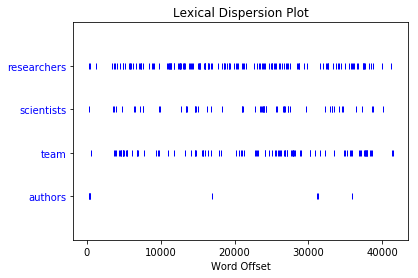

In [107]:
nltk_text.dispersion_plot(['researchers', 'scientists', 'team', 'authors'])

As expected, "researchers" is used frequently throughout all documents. "Scientists" and "team" are used less  and have similar frequencies. "Authors" is only used in several documents.


To know what researchers are doing, we can use concordance() for **researchers, scientists and team**

In [108]:
nltk_text.concordance('researchers', lines=10, width=90)
nltk_text.concordance('scientists', lines=10, width=90)
nltk_text.concordance('team', lines=10, width=90)

Displaying 10 of 162 matches:
2016 and most were authored by Chinese researchers although that does n't automatically r
volutionary CRISPR experiments Chinese researchers are major players in the international
h thing Several University of Michigan researchers asked people to report which foods on 
able habitat for the parasite with the researchers commenting that human-caused factors s
Been Discovered Hiding in The Pancreas Researchers have found a brand new type of insulin
ectively in order to properly treat it researchers would need to find a way to regenerate
ly what happens in type 1 diabetes the researchers studied both mice and human tissue Hui
e body and produce insulin in response Researchers also know that the islets contain cell
re beta cells But that was n't all the researchers found They also observed some mature b
 the 2014 success never went ahead the researchers found genetic abnormalities in the iPS
Displaying 10 of 86 matches:
 was what 's known as 'fake peer review S

It is tedious to look through all the lines. Instead, we can collect sentences containing **researchers, scientists and team** and then find the most popular words in those sentences. 

In [8]:
from nltk.tokenize import sent_tokenize

sent_tokenize_list = sent_tokenize(full_text)
print('Number of sentences: ', len(sent_tokenize_list))

filted_sent_list = []
for sentence in sent_tokenize_list:
    if "researchers" in sentence or "scientists" in sentence or "team" in sentence:
        filted_sent_list.append(sentence)

print('Number of sentences containing the three words: ', len(filted_sent_list))

Number of sentences:  1650
Number of sentences containing the three words:  286


In [9]:
def get_freq_dist(text):
    tokens = nltk.word_tokenize(text)
    filtered_words = []
    for word in tokens:
        if word.lower() not in stopwords.words('english') and check_character(word):
            filtered_words.append(word)
    filtered_text = nltk.Text(filtered_words)
    filtered_freq_dist = nltk.FreqDist(filtered_text)
    return filtered_freq_dist

In [10]:
freq_dist = get_freq_dist(" ".join(filted_sent_list))

freq_dist.most_common(20)

[('researchers', 141),
 ('team', 98),
 ('scientists', 59),
 ('cells', 58),
 ('could', 50),
 ('one', 33),
 ('study', 32),
 ('cancer', 32),
 ('found', 31),
 ('University', 27),
 ('new', 26),
 ('mice', 26),
 ('human', 20),
 ('people', 19),
 ('cell', 18),
 ('says', 18),
 ('brain', 18),
 ('research', 17),
 ('disease', 17),
 ('also', 17)]

Some interesting words with high frequencies are: **cells, cancer, University**.

It may be possible to interpret the findings as follows:

* Health reseach these days often focuses on studying "cells". 
* "Cancer" also receives a lot of attention of scientists.  
* Research teams mentioned in the articles are usually from universities

We will see how these words are distributed with dispersion plot

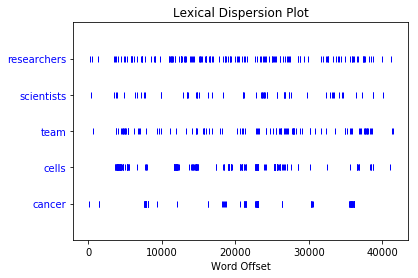

In [136]:
nltk_text.dispersion_plot(['researchers', 'scientists', 'team', 'cells', 'cancer'])

We will go further by finding noun phrases containing **"cells"**. The possible patterns as follows:

* Adj + cells
* Noun + cells
* Cells + noun

The following chunk of code will find the frequency distribution of phrases which follow patterns above.

In [89]:

def get_phrase_dist(word):
    accepted_tags = ['NOUN', 'ADJ']
    phrase_dist = {}
    tags = nltk.pos_tag(tokens, tagset='universal') 

    for i,tag in enumerate(tags):
        if tag[0].lower() == word:
            if tags[i-1][1] in accepted_tags:
                phrase = (tags[i-1][0]+' '+tag[0]).lower()
                if phrase in phrase_dist:
                    phrase_dist[phrase] += 1
                else:
                    phrase_dist[phrase] = 1
    return phrase_dist


In [63]:
cell_phrase_dist = get_phrase_dist('cells')
sorted_cell_phrase_dist = sorted(cell_phrase_dist.items(), key=lambda x: x[1], reverse=True)
sorted_cell_phrase_dist[:10]

[('stem cells', 19),
 ('beta cells', 17),
 ('t cells', 17),
 ('blood cells', 16),
 ('cancer cells', 15),
 ('immune cells', 10),
 ('brain cells', 7),
 ('senescent cells', 6),
 ('ips cells', 4),
 ('sperm cells', 4)]

NLTK dispersion_plot is unable to draw a graph with a phrase. Instead, to find how popular these phrases across the documents, we will write a function to calculate how many documents having the phrase.

In [86]:
def ndoc_count(phrase):
    doc = []

    for i, text in enumerate(bloblist):
        if phrase in text:
            doc.append(i+1)
    return doc

def get_doc_dist(phrase_dist):
    doc_dist = {}
    for phrase, freq in sorted_cell_phrase_dist:
        count = len(ndoc_count(phrase))
        doc_dist[phrase] = count
    return doc_dist



In [87]:
cell_doc_dist = get_doc_dist(cell_phrase_dist)
sorted_cell_doc_dist = sorted(cell_doc_dist.items(), key=lambda x: x[1], reverse=True)
sorted_cell_doc_dist[:10]



[('t cells', 7),
 ('immune cells', 6),
 ('brain cells', 5),
 ('stem cells', 4),
 ('blood cells', 4),
 ('cancer cells', 3),
 ('cancerous cells', 3),
 ('healthy cells', 3),
 ('sperm cells', 2),
 ('skin cells', 2)]

Dispite having a high frequency, "beta cells" disibutes in only 1 document, making it not popular among documents. The most popular phrases containing "cells" are: **t-cells, immune cells, brain cells, stem cells, and blood cells**.

T-cells are a type of white blood cell that circulate around our bodies, scanning for cellular abnormalities and infections. They play a key importance to the immune system and is at the core of adaptive immunity. T-cells are also responsible for immune responses that leat to:

* Rejection of a transplanted organ
* Virtually all autoimmune disease (diabetes, multiple sclerosis, rheumatoid arthritis etc.)
* Some allergic reactions (gluten intolerance etc.)

This may be the reason why "t-cells" and "immune cells" are popular in the news about health.

In [135]:
nltk_text.concordance('t-cells')

Displaying 13 of 13 matches:
n That Can Pump Out Cancer-Fighting T-Cells Scientists have developed an artifi
uld produce special cancer-fighting T-cells in the body on demand T-cells are w
hting T-cells in the body on demand T-cells are white blood cells that naturall
t and uses blood stem cells to make T-cells which then go onto fight infection 
hymus to turn blood stem cells into T-cells that attacked cancerous growths whi
xtra powers What 's more our normal T-cells can get worn out by fast-growing ca
e natural process inside our bodies T-cells produced by the thymus are given sp
 to add cancer-seeking receptors to T-cells for several years now in a process 
till in the early stages of testing T-cells are collected from patients reprogr
relies on the patient having enough T-cells to make use of in the first place T
hich could pump out cancer-fighting T-cells from stem cells or donated blood mo
 and safe supply of cancer-fighting T-cells would be to control the process in 
ificial thy

The concordance for **"T-cells"** indicates that T-cells are highly related to cancer research, and stem cells somehow can be turned into T-cells.



Besides the patterns above, we will try investigating the following pattern:
    
* Cell + Noun

In [90]:

def get_phrase_dist2(word):
    accepted_tags = ['NOUN']
    phrase_dist = {}
    tags = nltk.pos_tag(tokens, tagset='universal') 

    for i,tag in enumerate(tags):
        if tag[0].lower() == word:
            if tags[i+1][1] in accepted_tags:
                phrase = (tag[0]+' '+tags[i+1][0]).lower()
                if phrase in phrase_dist:
                    phrase_dist[phrase] += 1
                else:
                    phrase_dist[phrase] = 1
    return phrase_dist

cell_phrase_dist2 = get_phrase_dist2('cell')
sorted_cell_phrase_dist2 = sorted(cell_phrase_dist2.items(), key=lambda x: x[1], reverse=True)
sorted_cell_phrase_dist2[:10]

[('cell products', 4),
 ('cell division', 4),
 ('cell treatments', 2),
 ('cell response', 2),
 ('cell product', 2),
 ('cell line', 2),
 ('cell cultures', 2),
 ('cell death', 2),
 ('cell damage', 2),
 ('cell has', 1)]

This doesn't give us much information, so we will leave it here and go back to the three initial words **researchers, scientists, team** with looking at clusters.

We will find clusters containing the three words. The clusters can be divided into two cases: clusters on the left side of the word, and clusters on the right side of the word.

In [155]:
# nword: number of words in the cluster
def get_clusters(word, position, nword):
    cluster = {}
    for i, token in enumerate(tokens):
        if word == token.lower():
            phrase = word
            if position == 'left':
                for j in range(nword-1):
                    phrase = (tokens[i-j-1]+' '+phrase).lower()
                if phrase in cluster:
                    cluster[phrase] += 1
                else:
                    cluster[phrase] = 1
            else:
                for j in range(nword-1):
                    phrase = (phrase + ' ' + tokens[i+j+1]).lower()
                if phrase in cluster:
                    cluster[phrase] += 1
                else:
                    cluster[phrase] = 1
    return cluster

def sorted_cluster(cluster):
    return sorted(cluster.items(), key=lambda x: x[1], reverse=True)

word_cluster = get_clusters('researchers', 'right', 2)
print(sorted_cluster(word_cluster)[:10])

word_cluster = get_clusters('scientists', 'right', 2)
print(sorted_cluster(word_cluster)[:10])

word_cluster = get_clusters('team', 'right', 2)
print(sorted_cluster(word_cluster)[:10])


[('researchers ,', 19), ('researchers have', 19), ('researchers found', 10), ('researchers from', 9), ('researchers are', 8), ('researchers say', 7), ('researchers write', 5), ('researchers looked', 5), ('researchers will', 4), ('researchers also', 3)]
[('scientists have', 26), ('scientists are', 12), ('scientists from', 6), ('scientists ,', 3), ('scientists say', 2), ('scientists to', 2), ('scientists can', 2), ('scientists write', 2), ('scientists think', 2), ('scientists do', 1)]
[('team ,', 7), ('team is', 7), ('team found', 6), ('team of', 5), ('team from', 5), ('team led', 4), ('team says', 3), ('team have', 2), ('team are', 2), ('team first', 2)]


**"found"** is usually used with "researchers, scientists and team" to introduce a discovery or a finding. Other words that may be used for this purpose are **"say"** and **"write"**.


In [164]:
word_cluster = get_clusters('researchers', 'right', 3)
print(sorted_cluster(word_cluster)[:10])

word_cluster = get_clusters('scientists', 'right', 3)
print(sorted_cluster(word_cluster)[:10])

word_cluster = get_clusters('team', 'right', 3)
print(sorted_cluster(word_cluster)[:10])

[('researchers have found', 6), ('researchers looked at', 5), ('researchers found that', 4), ('researchers from the', 4), ('researchers say it', 3), ('researchers have used', 2), ('researchers , benjamin', 2), ('researchers say the', 2), ('researchers have developed', 2), ('researchers write in', 2)]
[('scientists have been', 8), ('scientists are working', 2), ('scientists have discovered', 2), ('scientists have found', 2), ('scientists have turned', 2), ('scientists write in', 2), ('scientists are often', 1), ('scientists are known', 1), ("scientists do n't", 1), ('scientists so far', 1)]
[('team led by', 4), ('team found that', 3), ('team is now', 3), ('team used a', 2), ('team found evidence', 2), ('team have already', 1), ('team are calling', 1), ('team were looking', 1), ('team found a', 1), ('team of japanese', 1)]


Displaying 25 of 31 matches:
ase report broke the news that three women lost their eyesight by participating
published inMolecular Therapy 1 in 5 Women With UTIs Are Still Being Told There
worldwide every year most of them in women whose anatomy makes them more suscep
osomatic A substantial percentage of women visiting their general practitioner 
ed the urine of 308 participants 220 women who 'd complained of uncomplicated U
ted UTI symptoms and 86 samples from women without any symptoms control group A
st quantities of bacterial DNA Among women with UTI symptoms the standard test 
ound an infection in 98.2 percent of women who had UTI symptoms These findings 
ese findings suggest that almost all women with typical urinary complaints and 
e also planning to determine whether women with UTI symptoms but a negative cul
 'urethral syndrome and stop telling women that their uncomfortable symptoms ar
icult or impossible for some but for women who do n't experience those complica
oria is not

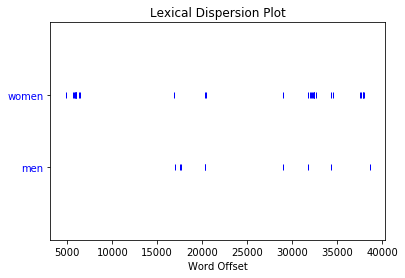

In [165]:
nltk_text.concordance('women')
nltk_text.concordance('men')
nltk_text.dispersion_plot(['women', 'men'])

Looking at the results for **"men"** and **"women"**, we can see a considerable difference in gender in health  news articles. **women** is mentioned 31 times, whereas **men** is only mentioned 9 times. But even with 9 times, 4 times out of which **"men"** goes with **"and women"**. This may implies either or all of these:

1. Health care news focuses more on women than men.
2. Females are more actively involved in medical research than males.
3. Women have more health problems than men.

In my opinion, (1) and (3) may be the main reasons for the gender bias in those articles. Indead, women often have more  health issues than men such as pregnancy or breast cancer. Some other usual health problems also affect women primarily or more severely than men. For instance, women are more likely to die following a heart attack than men are (Cardiovascular disease and other chronic conditions in women: Recent findings), women are more likely to report having stress, and almost 50% of all women in the survey, compared to 39% of the men, said their stress has increased over the past five years (Gender and Stress). For those reasons, it's understandable why news articles mention women more often than men.

It's also noticeable that women were commonly known to be excluded from medical studies (Soderstrom)(Holdcroft). Therefore, it appears to be not probable that (2) is the case.



In [163]:
word_cluster = get_clusters('women', 'right', 3)
print(sorted_cluster(word_cluster)[:10])

[('women with uti', 2), ('women lost their', 1), ('women with utis', 1), ('women , whose', 1), ('women visiting their', 1), ("women who 'd", 1), ('women without any', 1), ('women who had', 1), ('women with typical', 1), ('women that their', 1)]


In [167]:
nltk_text.similar('women')

people those patients animals participants a that is help as it data
wrong example new sugar cholesterol them medicine proteins
